In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# column names
cols = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca","thal","num"]

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease.csv",
                 names=cols, na_values="?")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
df = df.dropna()
print("After dropping missing rows:", df.shape)
# make target binary (0 = no disease, 1 = disease)
df["target"] = (df["num"] > 0).astype(int)
df = df.drop("num", axis=1)

# one-hot encode categorical columns
df = pd.get_dummies(df, columns=["cp","restecg","slope","thal"], drop_first=True)

# scale numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# save cleaned dataset
df.to_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_cleaned.csv", index=False)
print("Dataset cleaned & saved!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num     

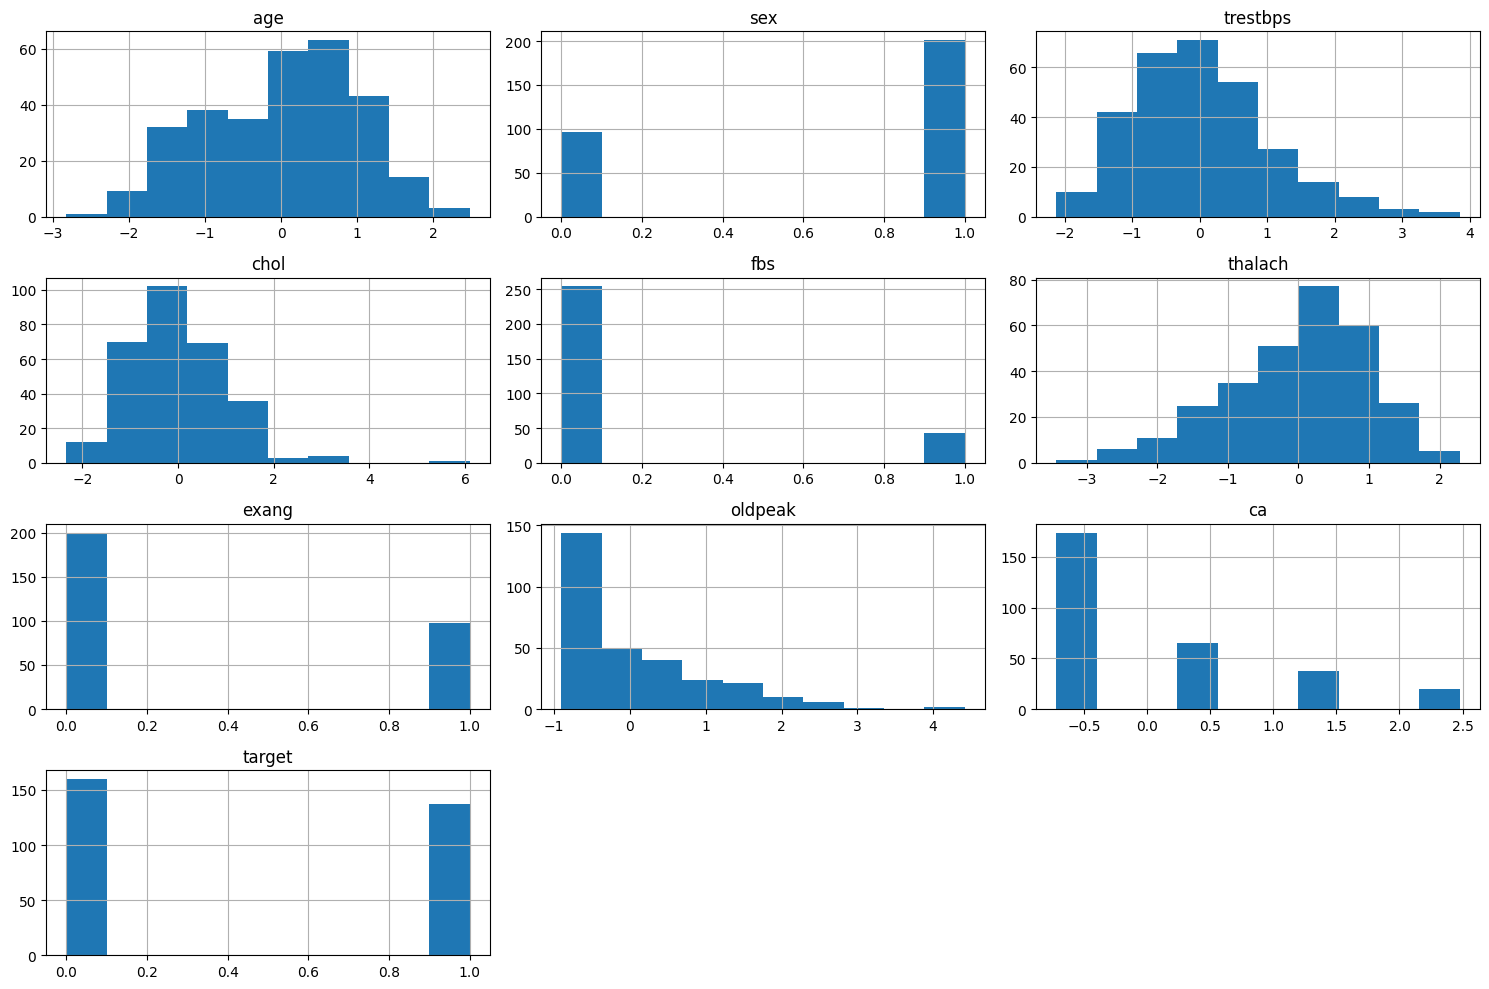

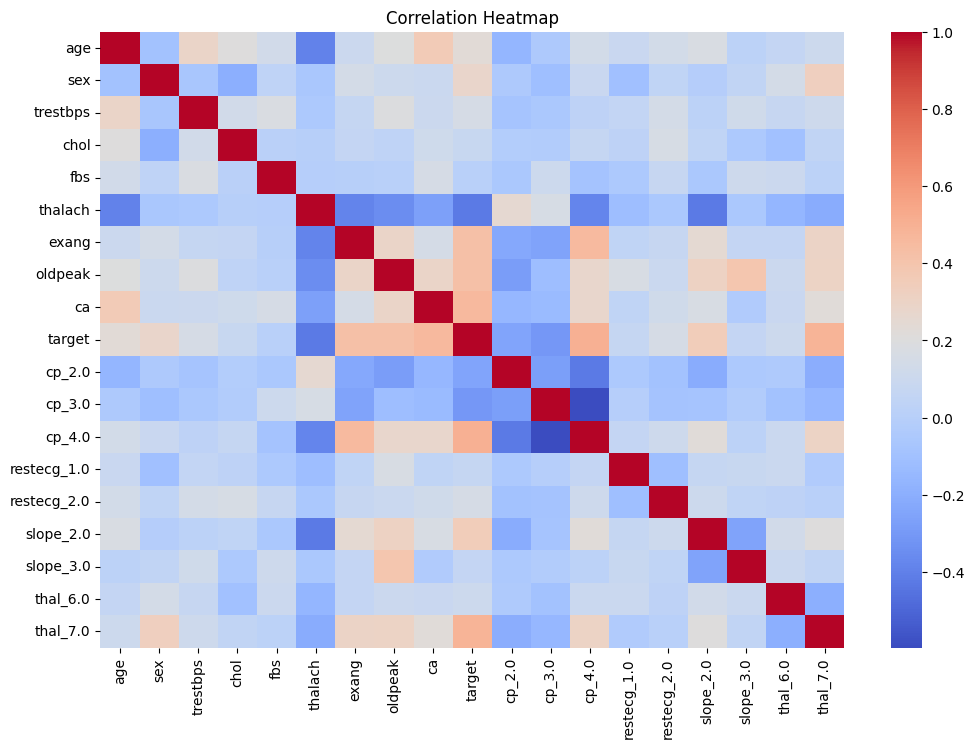

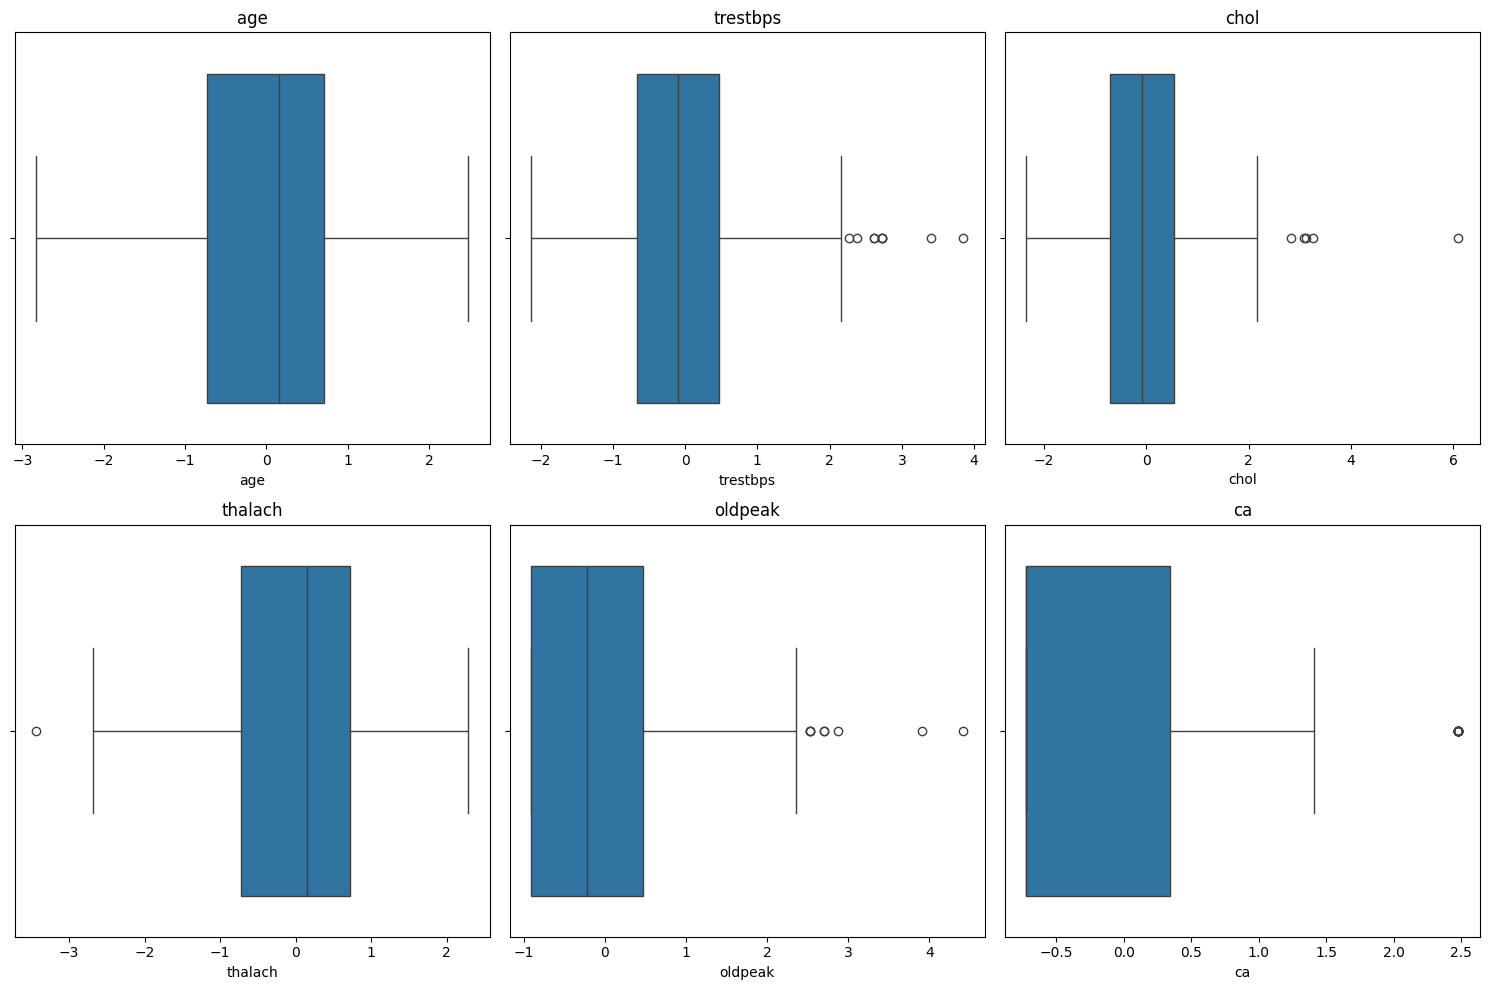

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograms for all features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# boxplots for numerical features
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

